In [28]:
import os, glob
import numpy as np
from PIL import Image
import pandas as pd
import cv2
from imageio import imread

In [30]:
data = pd.read_csv("C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/data.csv", names=['colA', 'colB'], error_bad_lines = False)
data.head

<bound method NDFrame.head of                   colA  colB
0    Video_25/RGB/481/     0
1    Video_27/RGB/147/     0
2    Video_30/RGB/299/     0
3    Video_30/RGB/300/     0
4    Video_42/RGB/367/     2
5    Video_42/RGB/395/     2
6   Video_100/RGB/683/     2
7   Video_100/RGB/711/     2
8   Video_791/RGB/478/     3
9      Video_19/RGB/5/     3
10    Video_20/RGB/16/     3
11    Video_20/RGB/19/     3
12    Video_136/RGB/6/     4
13   Video_136/RGB/80/     4
14  Video_137/RGB/128/     4
15   Video_137/RGB/13/     4
16  Video_729/RGB/930/     5
17   Video_25/RGB/450/     5
18    Video_25/RGB/52/     5
19    Video_45/RGB/35/     5
20  Video_310/RGB/470/     6
21    Video_311/RGB/5/     6
22   Video_313/RGB/12/     6
23   Video_313/RGB/42/     6
24  Video_103/RGB/705/     7
25  Video_112/RGB/315/     7
26  Video_116/RGB/163/     7
27  Video_116/RGB/495/     7
28   Video_227/RGB/90/     8
29  Video_228/RGB/145/     8
30  Video_228/RGB/155/     8
31  Video_228/RGB/159/     8>

In [4]:
import os, glob
import cv2
import numpy as np
from PIL import Image

TVL1 = cv2.createOptFlow_DualTVL1()
f = "D:/Dhivya_Classifier/videos/"
all_file = []

for i in range(len(data['colA'])):
  file1 = data.at[i, 'colA']
  #print(file1)
  fileArr = []
  for fil in glob.glob(os.path.join(f+file1, '*.jpg')):
    fileArr.append(fil)
  fileArr.sort()
  print(fileArr)
  try:
    current_file = []
    prev = np.array(Image.open(fileArr[0]))
    prev = cv2.resize(prev, dsize=(1280, 720), interpolation=cv2.INTER_LINEAR)
    prev = cv2.cvtColor(prev, cv2.COLOR_RGB2GRAY)
    for filename in fileArr:
      cur = np.array(Image.open(filename))
      cur = cv2.cvtColor(cur, cv2.COLOR_RGB2GRAY)
      cur = cv2.resize(cur, dsize=(1280, 720), interpolation=cv2.INTER_LINEAR)
      flow = TVL1.calc(prev, cur, None)
      current_file.append(flow)
      prev = cur
    all_file.append(np.array(current_file))
  except Exception as e:
    print(e)
    continue

all_file = np.array(all_file)
print(all_file.shape)

AttributeError: module 'cv2.cv2' has no attribute 'createOptFlow_DualTVL1'

In [65]:
temp = "D:/Dhivya_Classifier/videos/Video_25/RGB/481\\thumb000028870.jpg"
temp = temp.replace("RGB", "FLOW")
print(temp)

D:/Dhivya_Classifier/videos/Video_25/FLOW/481\thumb000028870.jpg


In [ ]:
import scipy.misc
scipy.misc.toimage(image_array, cmin=0.0, cmax=...).save('outfile.jpg')

In [67]:
all_file.shape

AttributeError: 'list' object has no attribute 'shape'

(720, 1280)
0.0 0.0


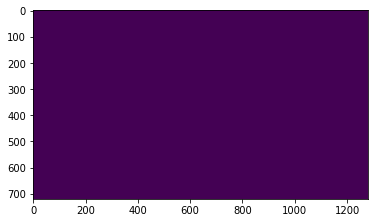

In [25]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2

def ToImg(raw_flow, bound=20):
    flow=raw_flow
    flow[flow>bound]=bound
    flow[flow<-bound]=-bound
    flow/=bound
    #flow*=(255/float(2*bound))
    return flow

TVL1 = cv2.optflow.DualTVL1OpticalFlow_create()
temp_prev = Image.open('C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_25/RGB/52\\thumb000003130.jpg')
prev = np.asarray(temp_prev)
prev = cv2.resize(prev, dsize=(1280, 720), interpolation=cv2.INTER_LINEAR)
prev = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(prev)
hsv[...,1] = 255
print(hsv.shape)
cur = np.array(Image.open('C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_25/RGB/52\\thumb000003131.jpg'))
cur = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
cur = cv2.resize(cur, dsize=(1280, 720), interpolation=cv2.INTER_LINEAR)
flow = TVL1.calc(prev, cur, None)
flow_x = ToImg(flow[..., 0], 20)
flow_y = ToImg(flow[..., 1], 20)
print(flow_y.min(), flow_y.max())
#flow = np.dstack((flow_x, flow_y, hsv))
#cv2.imshow('frame2', flow)
%matplotlib inline
plt.imshow(flow_x)

In [64]:
import os, glob
import cv2
import numpy as np
from PIL import Image
import os
from pathlib import Path, PureWindowsPath

TVL1 = cv2.optflow.DualTVL1OpticalFlow_create()
f = "C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/"
all_file = []

def ToImg(raw_flow, bound=20):
    flow=raw_flow
    flow[flow>bound]=bound
    flow[flow<-bound]=-bound
    flow/=bound
    flow*=127
    return flow

def SaveFlow(flow, file):
    flow_file = file.replace("RGB", "FLOW")
    flow_file = PureWindowsPath(flow_file)
    if not os.path.exists(flow_file):
        os.makedirs(flow_file)
    save_name = str(flow_file) + '\\flow.npz'
    np.savez_compressed(save_name, flow)
    print(save_name + " saved")

for i in range(len(data['colA'])):
  file1 = data.at[i, 'colA']
  fileArr = []
  for fil in glob.glob(os.path.join(f+file1, '*.jpg')):
    fileArr.append(fil)
  fileArr.sort()
  print(f+file1)
  try:
    current_file = []
    prev = np.array(Image.open(fileArr[0]))
    prev = cv2.resize(prev, dsize=(1280, 720), interpolation=cv2.INTER_LINEAR)
    prev = cv2.cvtColor(prev, cv2.COLOR_RGB2GRAY)
    for filename in fileArr:
      cur = np.array(Image.open(filename))
      cur = cv2.cvtColor(cur, cv2.COLOR_RGB2GRAY)
      cur = cv2.resize(cur, dsize=(1280, 720), interpolation=cv2.INTER_LINEAR)
      flow = TVL1.calc(prev, cur, None)
      flow_x = ToImg(flow[..., 0], 20)
      flow_y = ToImg(flow[..., 1], 20)
      #print(flow_y.min(), flow_y.max())
      current_file.append((flow_x, flow_y))
      prev = cur
    #all_file.append(np.array(current_file))
    current_file = np.array(current_file).astype(np.int8, copy=False)
    SaveFlow(np.array(current_file), f+file1)
  except Exception as e:
    print(e)
    continue

all_file = np.array(all_file)
print(all_file.shape)

C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_25/RGB/481/
C:\Users\LabUser\Downloads\Dhivya_Classifier\Dhivya_Classifier\videos\Video_25\FLOW\481\flow.npz saved
C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_27/RGB/147/
C:\Users\LabUser\Downloads\Dhivya_Classifier\Dhivya_Classifier\videos\Video_27\FLOW\147\flow.npz saved
C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_30/RGB/299/
C:\Users\LabUser\Downloads\Dhivya_Classifier\Dhivya_Classifier\videos\Video_30\FLOW\299\flow.npz saved
C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_30/RGB/300/
C:\Users\LabUser\Downloads\Dhivya_Classifier\Dhivya_Classifier\videos\Video_30\FLOW\300\flow.npz saved
C:/Users/LabUser/Downloads/Dhivya_Classifier/Dhivya_Classifier/videos/Video_42/RGB/367/
C:\Users\LabUser\Downloads\Dhivya_Classifier\Dhivya_Classifier\videos\Video_42\FLOW\367\flow.npz saved
C:/Users/LabUser/Downloads/Dhivya_Classifier/

In [33]:
new_file = all_file

In [34]:
print(new_file[0].shape)

(60, 2, 720, 1280)


In [55]:
x = "\\\\"
x = x.replace("\\\\", "\\")
x

'\\'